In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#!pip install pandas scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spam-email-classification/email.csv


In [56]:
email_data = pd.read_csv('/kaggle/input/spam-email-classification/email.csv')
email_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [67]:
email_data.Category.unique()

array(['ham', 'spam'], dtype=object)

In [68]:
email_data[email_data['Category']=='{"mode":"full"']

,Category,Message


In [66]:
email_data = email_data.drop(5572)

In [69]:
email_data.shape

(5572, 2)

In [70]:
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [71]:
X = email_data['Message']
y = email_data['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [73]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [74]:
y_pred = model.predict(X_test_vectorized)

In [77]:
accuracy = metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
#precision = metrics.precision_score(y_test, y_pred, pos_label='spam', average='weighted')
#recall = metrics.recall_score(y_test, y_pred, pos_label='spam', average='weighted')

precision = metrics.precision_score(y_test, y_pred, pos_label='spam')
recall = metrics.recall_score(y_test, y_pred, pos_label='spam')

print(f'Accuracy: {round(accuracy*100,2)} %')
print(f'Confusion Matrix:\n{confusion_matrix}')
print(f'Precision: {round(precision*100,2)} %')
print(f'Recall: {round(recall*100,2)} %')

Accuracy: 99.19 %
Confusion Matrix:
[[966   0]
 [  9 140]]
Precision: 100.0 %
Recall: 93.96 %


ROC AUC: 0.9787124654355469


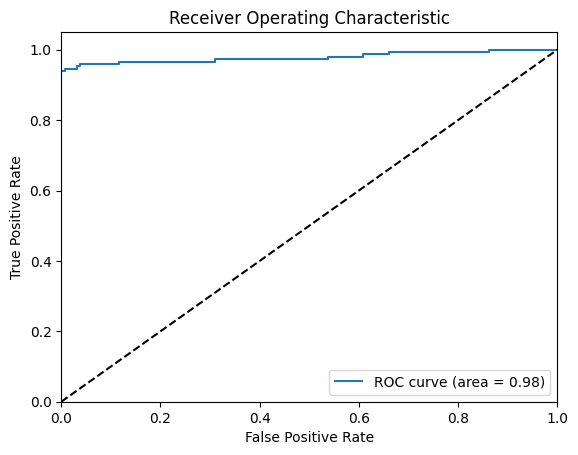

In [78]:
y_prob = model.predict_proba(X_test_vectorized)[:, 1]  # Probability for the positive class
roc_auc = metrics.roc_auc_score(y_test.apply(lambda x: 1 if x == 'spam' else 0), y_prob)

# Print ROC AUC
print(f'ROC AUC: {roc_auc}')

# Plot ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test.apply(lambda x: 1 if x == 'spam' else 0), y_prob)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()